total Dataset of val2017 is :  1


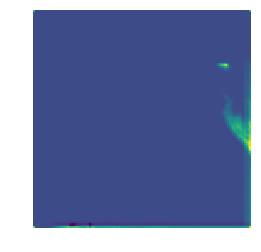

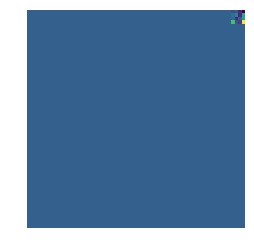

In [18]:
from __future__ import print_function, absolute_import

import os 
import torch
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torchvision
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
import scipy.misc
import sys, math
sys.path.append('..')

import scripts.utils
from scripts.utils.logger import Logger, savefig
from scripts.utils.evaluation import accuracy, AverageMeter, final_preds
from scripts.utils.misc import save_checkpoint, save_pred, adjust_learning_rate
from scripts.utils.osutils import mkdir_p, isfile, isdir, join
from scripts.utils.imutils import batch_with_heatmap,normalize_batch,im_to_numpy
from scripts.utils.transforms import fliplr, flip_back
import scripts.models as models
import scripts.datasets as datasets
import random
from matplotlib import cm

class objectview(object):
    def __init__(self, *args, **kwargs):
        d = dict(*args, **kwargs)
        self.__dict__ = d


dataset_name= 'val2017'
dataroot = '/home/oishii/Documents/coco_data_maker/synthesis_coco_v4/'

data_config  = objectview({'input_size':256,'normalized_input':False,'data_augumentation':False,'withseg':False})
sample = random.sample(range(1500), 1);
# sample=[557]

def hook1(module,inputdata,output):
    dd = output.data[0].numpy()
    np.savetxt('background.out',np.squeeze(dd))
    
def hook2(module,inputdata,output):
    dd = output.data[0].numpy()
    np.savetxt('mixed.out',np.squeeze(dd))
    
def hook3(module,inputdata,output):
    dd = output.data[0].numpy()
    np.savetxt('spliced.out',dd)
    
def hook4(module,inputdata,output):
    dd = output.data[0].numpy()
    np.savetxt('background2.out',dd)
    
def hook5(module,inputdata,output):
    dd = output.data[0].numpy()
    np.savetxt('mixed2.out',dd)
    
def hook6(module,inputdata,output):
    dd = output.data[0].numpy()
    np.savetxt('spliced2.out',dd)
    
def hook7(module,inputdata,output):
    dd = output.data[0].numpy()
    np.savetxt('background3.out',dd)
    
def hook8(module,inputdata,output):
    dd = output.data[0].numpy()
    np.savetxt('mixed3.out',dd)
    
def hook9(module,inputdata,output):
    dd = output.data[0].numpy()
    np.savetxt('spliced3.out',dd)
    
def feature_hook(module,inputdata,output):
    dd = output.data[0].numpy()
#     for i in range(dd.shape[0]):
# #         normalized
#         a = dd[i,:,:]
#         im = (255*(a - np.min(a))/np.ptp(a)).astype(np.uint8)
#         imm = Image.fromarray(im)
#         imm.save('%s.png'%str(i))
        
    
    
# run with gan-based method            
with torch.no_grad():
        val_loader = torch.utils.data.DataLoader(datasets.COCO(dataroot,dataset_name,config=data_config,sample=sample,gan_norm=False),
                                                 batch_size=1, shuffle=False,
                                                 num_workers=1, pin_memory=False)
        checkpoint_dict = torch.load('/home/oishii/Documents/deep-harimonization-improved/psnr/cocov4/1e3_bs8_256_2017_radhnv3xnomask/model_best.pth.tar')
            
        for i, (inputs, target) in enumerate(val_loader):            
            
            model = models.__dict__['radhnv3xnomask']()
            model.load_state_dict(checkpoint_dict['state_dict'])
            model.eval()

            inputs = inputs
            target = target[0]
            handle1 = model.model.model.sub.model.attention.mask_attention.fc.register_forward_hook(hook1)
            handle2 = model.model.model.sub.model.sub.model.attention.mask_attention.fc.register_forward_hook(hook2)
            
            output = model(inputs)
            
            torchvision.utils.save_image(inputs[0,0:3,:,:],"%s.png"%sample)
            torchvision.utils.save_image(inputs[0,3:4,:,:],"%s_mask.png"%sample)
            
            handle1.remove()
            handle2.remove()
        
            
#             print(model.model.model.sub.model.attention.spliced_attention.fc)
            

# x31 = np.genfromtxt('spliced.out').reshape((1,64)).repeat(8,axis=1).repeat(8,axis=0);

# x12 = np.genfromtxt('background2.out').reshape((1,128)).repeat(4,axis=1).repeat(4,axis=0);
# x22 = np.genfromtxt('mixed2.out').reshape((1,128)).repeat(4,axis=1).repeat(4,axis=0);
# x32 = np.genfromtxt('spliced2.out').reshape((1,128)).repeat(4,axis=1).repeat(4,axis=0);


# x13 = np.genfromtxt('background3.out').reshape((1,256)).repeat(2,axis=1).repeat(2,axis=0);
# x23 = np.genfromtxt('mixed3.out').reshape((1,256)).repeat(2,axis=1).repeat(2,axis=0);
# x33 = np.genfromtxt('spliced3.out').reshape((1,256)).repeat(2,axis=1).repeat(2,axis=0);


# img = (np.concatenate((x11,x21,x31,line,x12,x22,x32,line,x13,x23,x33),axis=0).clip(0,1)*255).astype(np.uint8);

# plt.imshow(img)
# plt.axis('off')
# plt.show()

# Image.fromarray(img[:,192:256]).save("%s_attention.png"%sample)           
        # line = np.zeros((1,512))
x11 = np.genfromtxt('background.out');
x21 = np.genfromtxt('mixed.out');


plt.imshow(x11)
plt.axis('off')
plt.show()

plt.imshow(x21)
plt.axis('off')
plt.show()

In [25]:
print(model)

UnetGenerator(
  (model): UnetSkipConnectionBlock(
    (model): MinimalUnet(
      (down): Sequential(
        (0): Conv2d(4, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      )
      (up): Sequential(
        (0): ReLU(inplace)
        (1): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      )
      (sub): UnetSkipConnectionBlock(
        (model): MinimalUnet(
          (down): Sequential(
            (0): LeakyReLU(negative_slope=0.2, inplace)
            (1): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
            (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
          (up): Sequential(
            (0): ReLU(inplace)
            (1): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
            (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
          (sub): Un